# Symmetric vs asymmetric parcellation


In [1]:
import sys
sys.path.append("..")
import ProbabilisticParcellation.evaluate as ev
import ProbabilisticParcellation.util as ut
import ProbabilisticParcellation.export_atlas as ea
import ProbabilisticParcellation.scripts.atlas_paper.parcel_hierarchy as ph
import ProbabilisticParcellation.scripts.atlas_paper.evaluate_atlas as eva
from Functional_Fusion.dataset import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import torch as pt



/Users/callithrix/Documents/Projects/Functional_Fusion/code/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
figsize = (20, 20)
lut_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/ProbabilisticParcellationModel/Atlases/'
_, cmap, labels = nt.read_lut(lut_dir +
                              'sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68.lut')
models = [
    'Models_03/sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68',
    'Models_03/asym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_arrange-asym_sep-hem']

model_pair = ['Models_03/sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_reordered',
              'Models_03/asym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_arrange-asym_sep-hem_reordered']

atlas = 'MNISymC2'

### Individual Parcellation

In [19]:
# prob_a = ev.parcel_individual(model_pair[0])
# prob_b = ev.parcel_individual(model_pair[1])

# load Uhats
# prob_a = pt.load(f'{ut.model_dir}/Models/{model_pair[0]}_Uhat.pt')
# prob_b = pt.load(f'{ut.model_dir}/Models/{model_pair[1]}_Uhat.pt')

parcel_a = pt.argmax(prob_a, dim=1) +1
parcel_b = pt.argmax(prob_b, dim=1) +1


In [4]:
parcel_a.shape

torch.Size([111, 18290])

In [5]:
_, cmap_reordered, labels_reordered = nt.read_lut(lut_dir +
                              'sym_MdPoNiIbWmDeSo_space-MNISymC2_K-68_reordered.lut')
subject_labels = [f'Subject {i}' for i in range(1, parcel_b.shape[0] + 1)]


<AxesSubplot: title={'center': 'Subject 2'}>

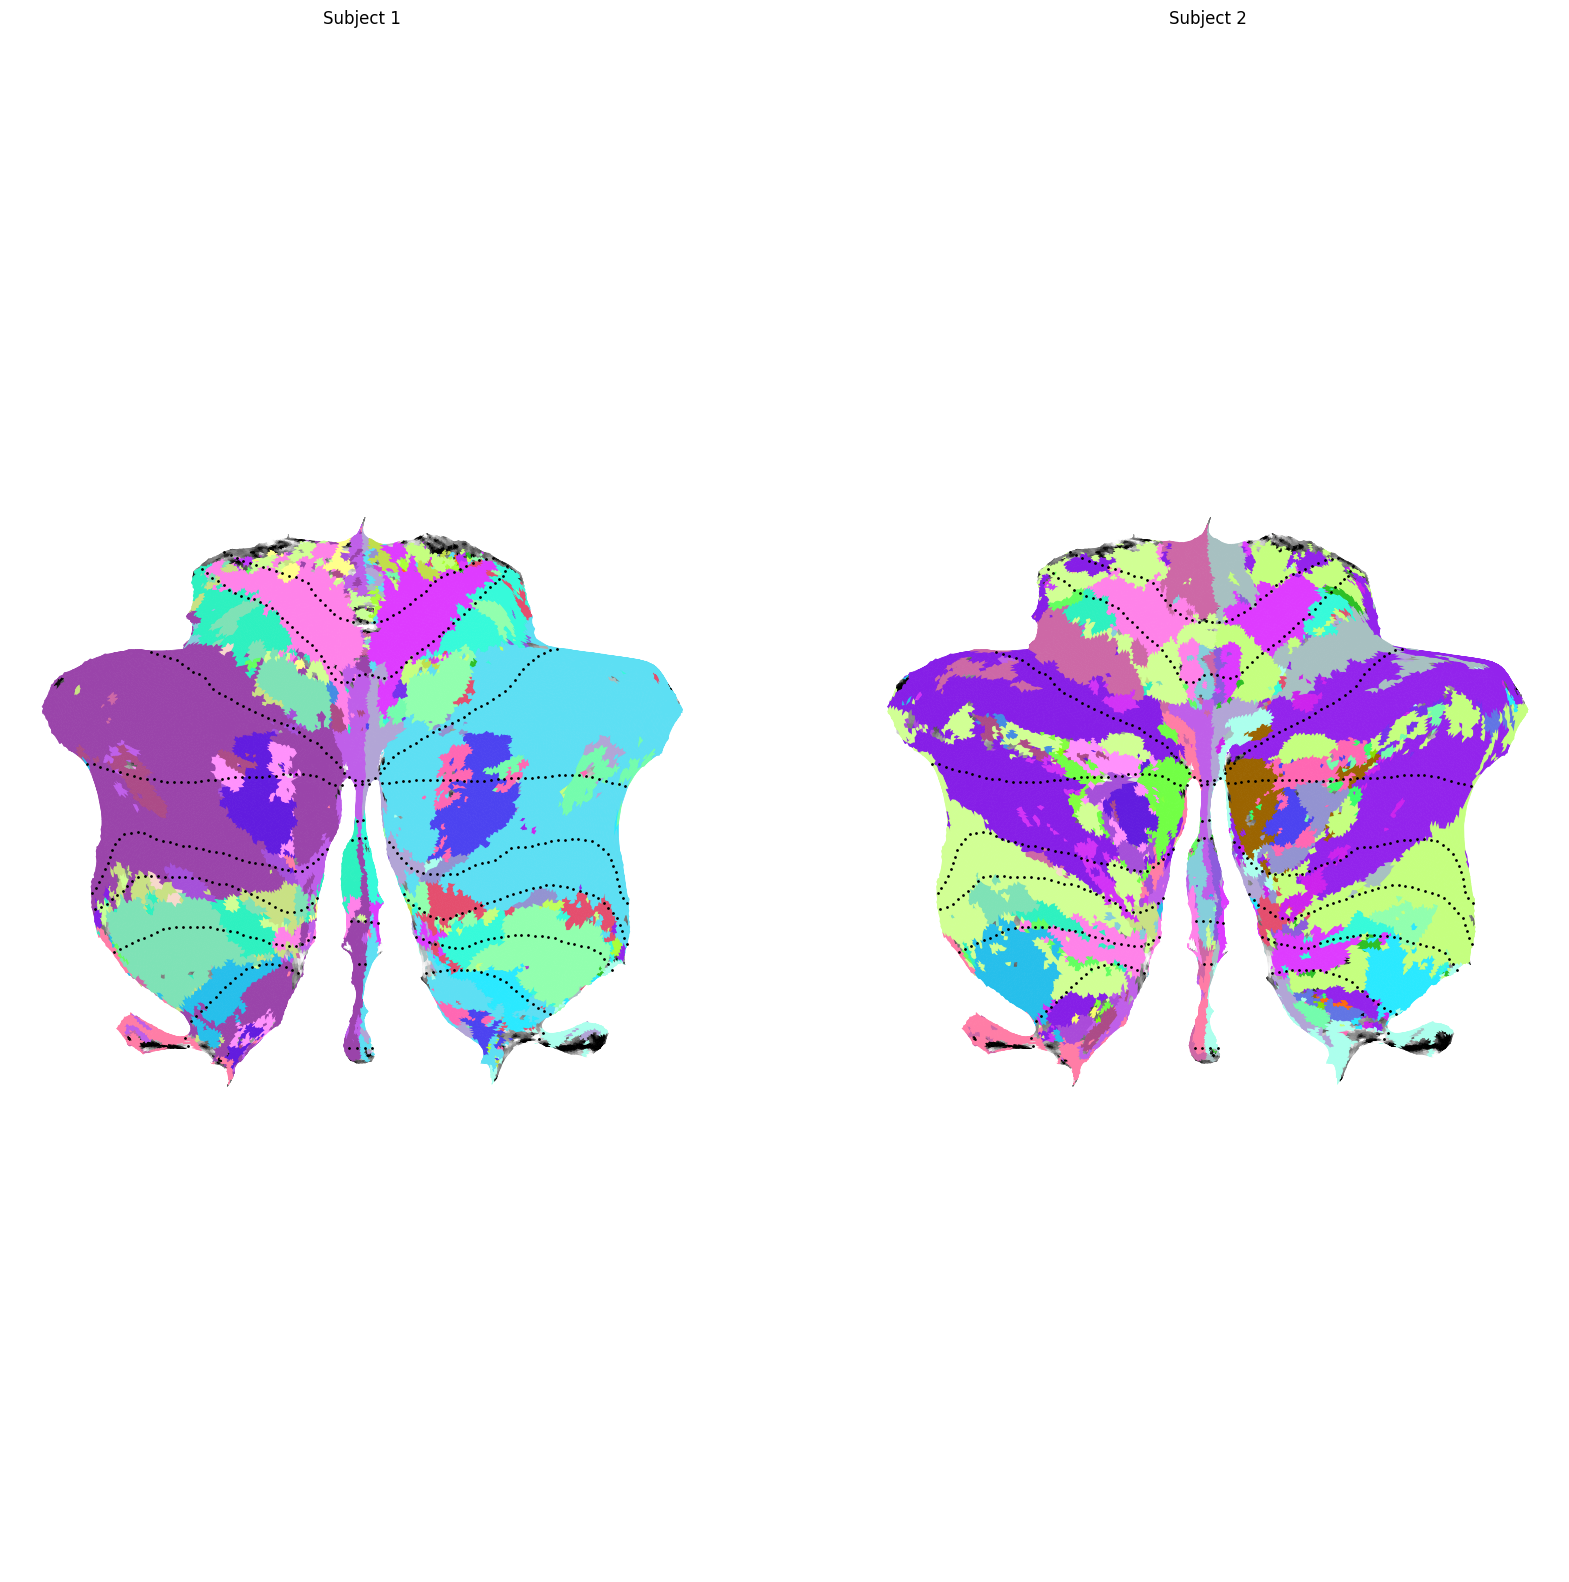

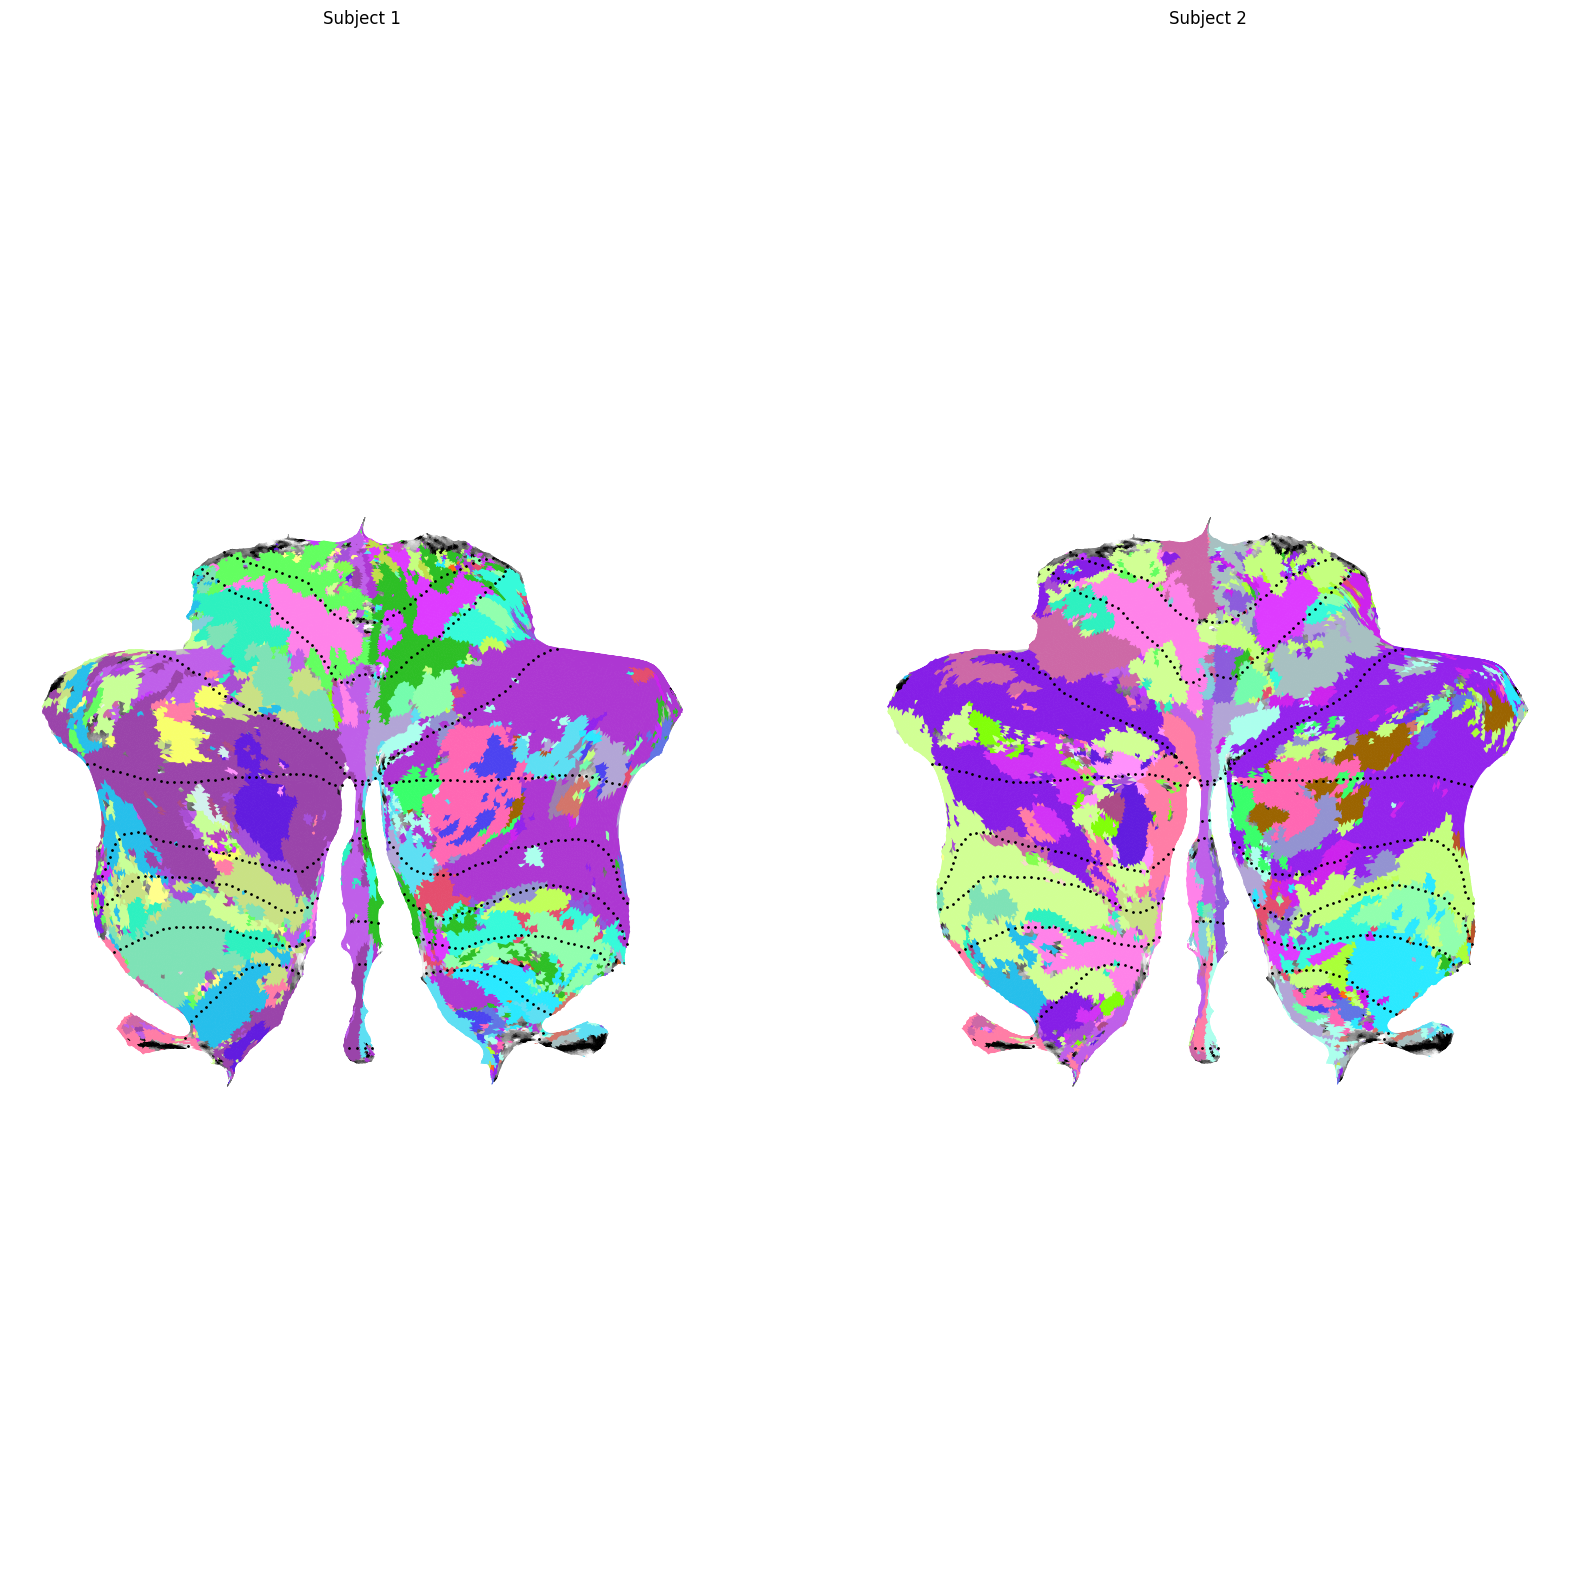

In [18]:
plt.figure(figsize=(20, 20))
# Make first 25 rows into list of 25 entries
parcel_a_list = [parcel_a[i, :] for i in range(parcel_a.shape[0])]
ut.plot_multi_flat(parcel_a_list[:2], 'MNISymC2',
                   grid=(1, 2),
                   dtype='label',
                   colorbar=False,
                   cmap=cmap_reordered,
                   titles=subject_labels[:2])

plt.figure(figsize=(20, 20))
parcel_b_list = [parcel_b[i, :] for i in range(parcel_b.shape[0])]
ut.plot_multi_flat(parcel_b_list[:2], 'MNISymC2',
                   grid=(1, 2),
                   dtype='label',
                   colorbar=False,
                   cmap=cmap_reordered,
                   titles=subject_labels[:2])


In [7]:
ari, ari_group = ev.ARI_voxelwise(
    parcel_a, parcel_b)


Calculating Adjusted Rand Index...
Computing WTA parcellation for individual 0...
Computing WTA parcellation for individual 1...
Computing WTA parcellation for individual 2...
Computing WTA parcellation for individual 3...
Computing WTA parcellation for individual 4...
Computing WTA parcellation for individual 5...
Computing WTA parcellation for individual 6...
Computing WTA parcellation for individual 7...
Computing WTA parcellation for individual 8...
Computing WTA parcellation for individual 9...
Computing WTA parcellation for individual 10...
Computing WTA parcellation for individual 11...
Computing WTA parcellation for individual 12...
Computing WTA parcellation for individual 13...
Computing WTA parcellation for individual 14...
Computing WTA parcellation for individual 15...
Computing WTA parcellation for individual 16...
Computing WTA parcellation for individual 17...
Computing WTA parcellation for individual 18...
Computing WTA parcellation for individual 19...
Computing WTA p

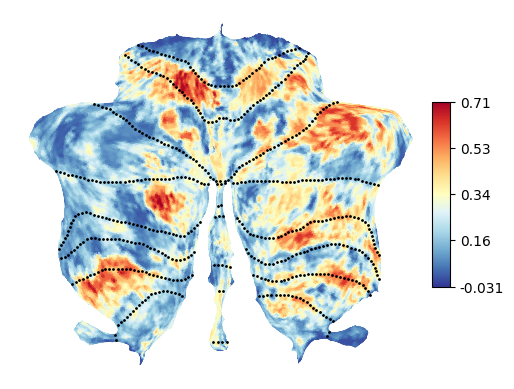

In [8]:
dtype = 'func'
cmap = 'RdYlBu_r'
labels = None,
colorbar = True
plt.figure()
ax = ut.plot_data_flat(ari, atlas,
                       dtype=dtype,
                       render='matplotlib',
                       cmap=cmap,
                       labels=labels,
                       colorbar=colorbar)
plt.show()

In [9]:
ri, ri_group = ev.ARI_voxelwise(
    parcel_a, parcel_b, adjusted=True)


Calculating Adjusted Rand Index...
Computing WTA parcellation for individual 0...
Computing WTA parcellation for individual 1...
Computing WTA parcellation for individual 2...
Computing WTA parcellation for individual 3...
Computing WTA parcellation for individual 4...
Computing WTA parcellation for individual 5...
Computing WTA parcellation for individual 6...
Computing WTA parcellation for individual 7...
Computing WTA parcellation for individual 8...
Computing WTA parcellation for individual 9...
Computing WTA parcellation for individual 10...
Computing WTA parcellation for individual 11...
Computing WTA parcellation for individual 12...
Computing WTA parcellation for individual 13...
Computing WTA parcellation for individual 14...
Computing WTA parcellation for individual 15...
Computing WTA parcellation for individual 16...
Computing WTA parcellation for individual 17...
Computing WTA parcellation for individual 18...
Computing WTA parcellation for individual 19...
Computing WTA p

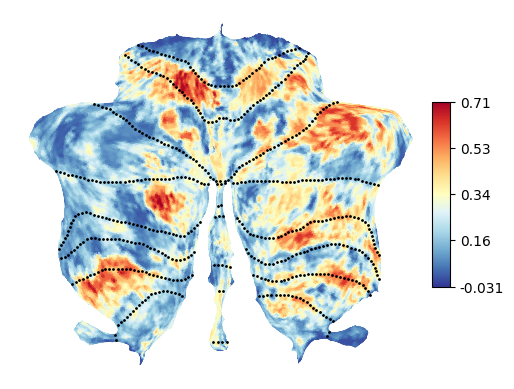

In [10]:
dtype = 'func'
cmap = 'RdYlBu_r'
labels = None,
colorbar = True
plt.figure()
ax = ut.plot_data_flat(ri, atlas,
                       dtype=dtype,
                       render='matplotlib',
                       cmap=cmap,
                       labels=labels,
                       colorbar=colorbar)
plt.show()


In [11]:
corr, corr_group = ev.compare_probs(
    prob_a, prob_b, method='corr')


Calculating correlation between probability maps...
Comparing probabilistic parcellation for individual 0...
Comparing probabilistic parcellation for individual 1...
Comparing probabilistic parcellation for individual 2...
Comparing probabilistic parcellation for individual 3...
Comparing probabilistic parcellation for individual 4...
Comparing probabilistic parcellation for individual 5...
Comparing probabilistic parcellation for individual 6...
Comparing probabilistic parcellation for individual 7...
Comparing probabilistic parcellation for individual 8...
Comparing probabilistic parcellation for individual 9...
Comparing probabilistic parcellation for individual 10...
Comparing probabilistic parcellation for individual 11...
Comparing probabilistic parcellation for individual 12...
Comparing probabilistic parcellation for individual 13...
Comparing probabilistic parcellation for individual 14...
Comparing probabilistic parcellation for individual 15...
Comparing probabilistic parcel

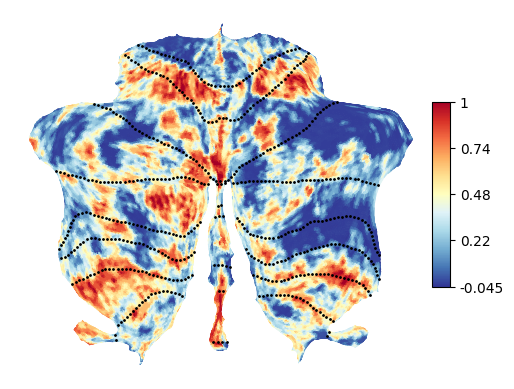

In [12]:
dtype = 'func'
cmap = 'RdYlBu_r'
labels = None,
colorbar = True
plt.figure()
ax = ut.plot_data_flat(corr, atlas,
                       dtype=dtype,
                       render='matplotlib',
                       cmap=cmap,
                       labels=labels,
                       colorbar=colorbar)
plt.show()


In [13]:

cosang, cosang_group = ev.compare_probs(
    prob_a, prob_b, method='cosang')


Calculating cosine similarity between probability maps...
Comparing probabilistic parcellation for individual 0...
Comparing probabilistic parcellation for individual 1...
Comparing probabilistic parcellation for individual 2...
Comparing probabilistic parcellation for individual 3...
Comparing probabilistic parcellation for individual 4...
Comparing probabilistic parcellation for individual 5...
Comparing probabilistic parcellation for individual 6...
Comparing probabilistic parcellation for individual 7...
Comparing probabilistic parcellation for individual 8...
Comparing probabilistic parcellation for individual 9...
Comparing probabilistic parcellation for individual 10...
Comparing probabilistic parcellation for individual 11...
Comparing probabilistic parcellation for individual 12...
Comparing probabilistic parcellation for individual 13...
Comparing probabilistic parcellation for individual 14...
Comparing probabilistic parcellation for individual 15...
Comparing probabilistic 

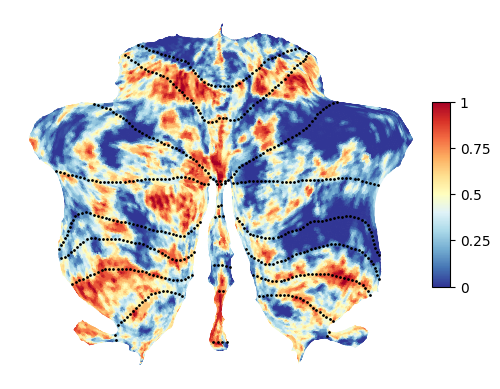

In [14]:
dtype = 'func'
cmap = 'RdYlBu_r'
labels = None,
colorbar = True
plt.figure()
ax = ut.plot_data_flat(cosang, atlas,
                       dtype=dtype,
                       render='matplotlib',
                       cmap=cmap,
                       labels=labels,
                       colorbar=colorbar)
plt.show()


In [15]:
# Save the results


### Compare symmetry by dataset

In [50]:
# Load number of participants
T = pd.read_csv(ut.base_dir + '/dataset_description.tsv', sep='\t')
n_subjects = T.num_particpants[:7].values
# Make index start at 0
sub_cumulative = np.cumsum(n_subjects)-1
print(sub_cumulative)


[ 23  31  37  50  66 103 111]


In [62]:
# Loop through n_subjects and group corr and cosang by dataset
corr_dataset = []
cosang_dataset = []
for i in range(len(n_subjects)):
    # print subjects to average to check subject indexing is correct
    
    if i == 0:
        print(sub_cumulative[i])
        corr_dataset.append(corr[:sub_cumulative[i]].mean(axis=0))
        cosang_dataset.append(cosang[:sub_cumulative[i]].mean(axis=0))
    else:
        print(sub_cumulative[i-1]+1, sub_cumulative[i])
        corr_dataset.append(
            corr[sub_cumulative[i-1]+1:sub_cumulative[i]].mean(axis=0))
        cosang_dataset.append(
            cosang[sub_cumulative[i-1]+1:sub_cumulative[i]].mean(axis=0))

23
24 31
32 37
38 50
51 66
67 103
104 111


<AxesSubplot: title={'center': 'Somatotopic'}>

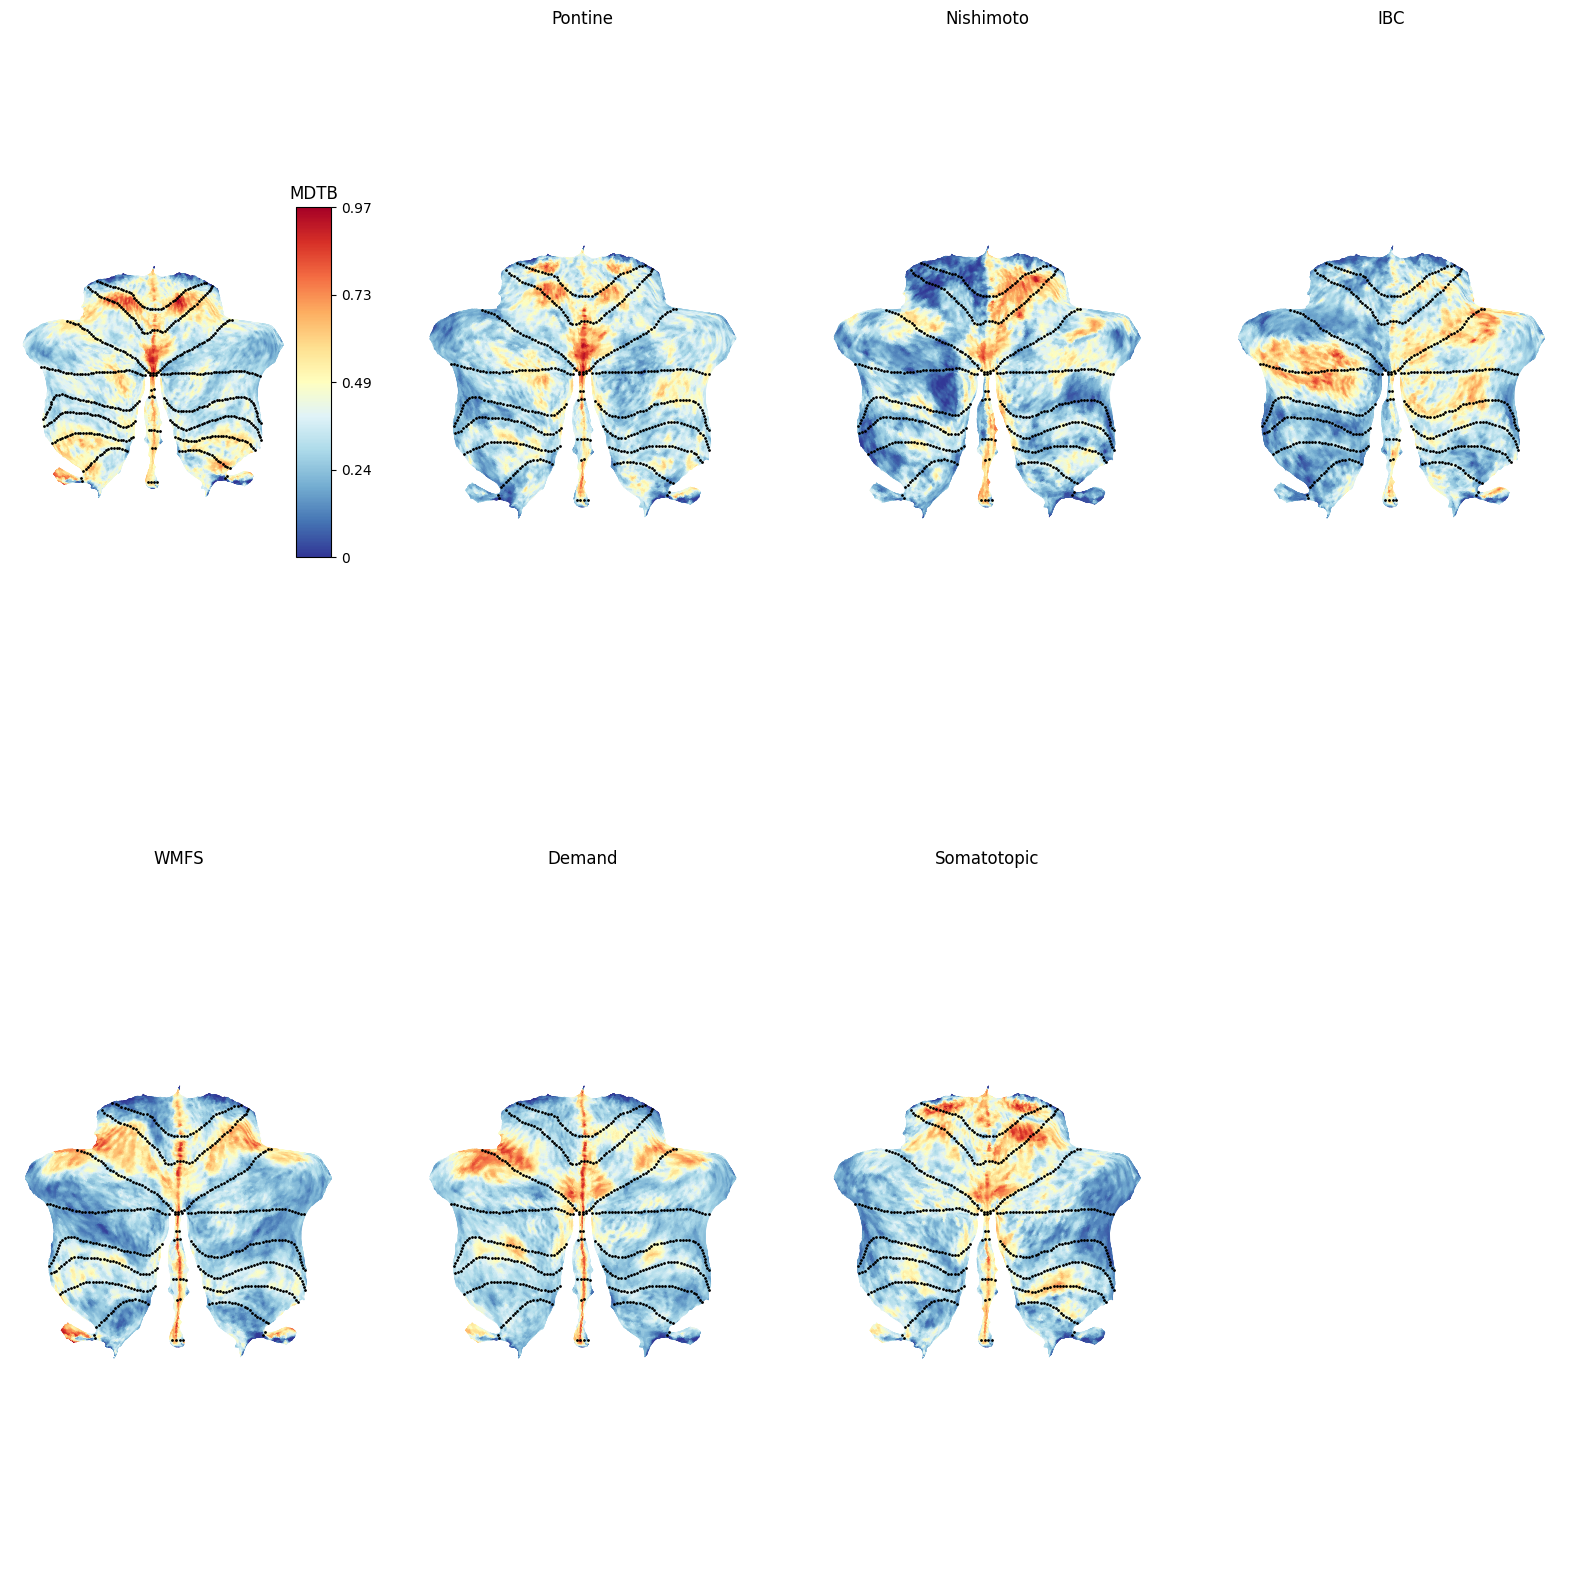

In [63]:
# Plot the results

plt.figure(figsize=(20, 20))
# Make first 25 rows into list of 25 entries
ut.plot_multi_flat(corr_dataset, 'MNISymC2',
                   grid=(2, 4),
                   dtype='func',
                   colorbar=True,
                   cmap='RdYlBu_r',
                   titles=T.name[:7].values)
